# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from scipy.stats import pearsonr
from scipy.spatial.distance import cdist

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [2]:
def GUC_Distance (Cluster_Centroids, Data_points, Distance_Type):
## write code here for the Distance function here #
    Number_of_Clusters = len(Cluster_Centroids)
    Number_of_points = len(Data_points)
    Cluster_Distance = np.zeros((Number_of_points, Number_of_Clusters))
    #Check the distance type
    if(Distance_Type == "Euclidean"):
        #use cdist function and specify the metric type as euclidean
        Cluster_Distance = cdist(Data_points,Cluster_Centroids,metric='euclidean')
    elif(Distance_Type == "Correlation"):
        for i, data_point in enumerate(Data_points):
            for j, centroid in enumerate(Cluster_Centroids):
                Cluster_Distance[i, j], _ = pearsonr(data_point, centroid)
        Cluster_Distance = 1 - Cluster_Distance
    return Cluster_Distance

Cluster_Centroids = np.array([[10,23,34],[4,5,6],[1,2,3]])
Data_points = np.array([[1,2,3],[4,5,6],[7,8,9]])
Data_points_mean = np.mean(Data_points, axis = 1)
print(Data_points_mean)
Cluster_Distance = GUC_Distance(Cluster_Centroids , Data_points, "Correlation")
Minimum_index = np.zeros(Data_points.shape[1])
Minimum_index = np.argmin(Cluster_Distance,axis = 1)
print(Cluster_Distance)
print(Minimum_index)
print(len(np.argmin(Cluster_Distance,axis = 1))) 

[2. 5. 8.]
[[1.15540189e-03 2.22044605e-16 2.22044605e-16]
 [1.15540189e-03 2.22044605e-16 2.22044605e-16]
 [1.15540189e-03 2.22044605e-16 2.22044605e-16]]
[1 1 1]
3


> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [12]:
import numpy as np

def GUC_Kmean(Data_points, Number_of_Clusters, Distance_Type):
    print("K-means started")
    
    # Initialize centroids using KMeans++ or random initialization
    centroids = Data_points[np.random.choice(Data_points.shape[0], Number_of_Clusters, replace=False)]
    
    # Initialize old centroids
    old_centroids = np.zeros_like(centroids)
    
    # Loop until convergence
    while not np.allclose(old_centroids, centroids, atol=1e-6):
        # Update old centroids
        old_centroids = np.copy(centroids)
        
        # Calculate distances between data points and centroids
        cluster_distances = GUC_Distance(centroids, Data_points, Distance_Type)
        
        # Assign each data point to the closest centroid
        minimum_index = np.argmin(cluster_distances, axis=1)
        
        # Update centroids
        for i in range(Number_of_Clusters):
            cluster_points = Data_points[minimum_index == i]
            if len(cluster_points) > 0:
                centroids[i] = np.mean(cluster_points, axis=0)
    
    # Compute distortion value
    distortion_value = 0
    for i in range(Number_of_Clusters):
        cluster_points = Data_points[minimum_index == i]
        distortion_value += np.sum((cluster_points - centroids[i]) ** 2)
    
    return Data_points, minimum_index, centroids, distortion_value

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [4]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [24]:
def display_cluster(X, data_centers=None, data_labels=None, num_clusters=0):
    color = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF', '#800000', '#008000', '#000080', '#808000', '#008080', '#800080']
    no_of_features = X.shape[1]
    plt.rcParams['figure.figsize'] = [10,3]
    #print("Data Labels:", data_labels)
    #print("Data Centers:", data_centers)
    if no_of_features != 2:
        for i in range(no_of_features-1):
            for j in range(i+1, no_of_features):
                fig,ax = plt.subplots()  
                if data_centers is not None and data_labels is not None:  
                    for k in range(num_clusters):
                        ax.scatter(data_centers[:, i][k], data_centers[:, j][k], c=color[k], marker='x', s=50)
                        ax.scatter(X[data_labels == k, i], X[data_labels == k, j], c=color[k], alpha=0.5, s=50)
                        ax.set_xlabel('Feature ' + str(i+1))
                        ax.set_ylabel('Feature ' + str(j+1))
                        
                    ax.set_title('Clustered Data with ' + str(num_clusters) + ' Clusters')
                else:
                     ax.scatter(X[:, i], X[:, j], c=color[0], alpha=0.5, s=50)
                     ax.set_xlabel('Feature ' + str(i+1))
                     ax.set_ylabel('Feature ' + str(j+1))
                     ax.set_title('Original Data')
                plt.show();
    
    else:  
        fig, ax = plt.subplots()  
        if data_centers is not None and data_labels is not None:  
            for k in range(num_clusters):
                ax.scatter(data_centers[:, 0][k], data_centers[:, 1][k], c=color[k], marker='x', s=50)
                ax.scatter(X[data_labels == k, 0], X[data_labels == k, 1], c=color[k], alpha=0.5, s=50)
                ax.set_xlabel('Feature 1')
                ax.set_ylabel('Feature 2')

            ax.set_title('Clustered Data with ' + str(num_clusters) + ' Clusters')
        else:
            ax.scatter(X[:, 0], X[:, 1], c=color[0], alpha=0.5, s=50)
            ax.set_xlabel('Feature 1')
            ax.set_ylabel('Feature 2')
            ax.set_title('Original Data')

        plt.show();
    

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

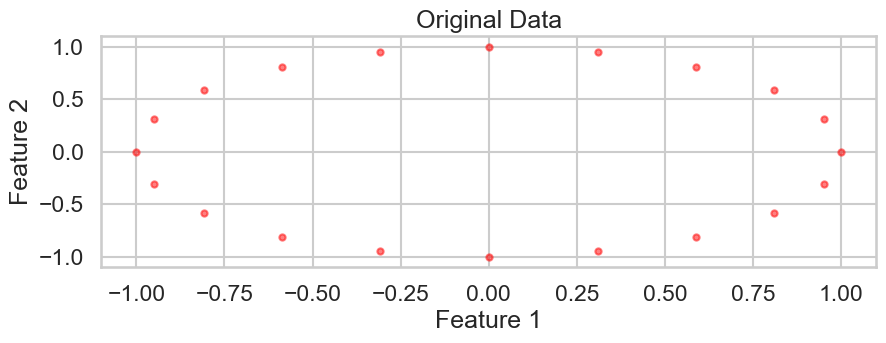

In [15]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X_1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X_1)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

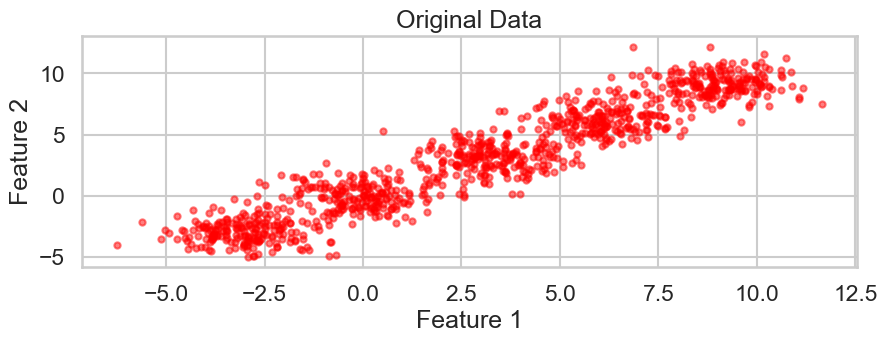

In [16]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X_2, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X_2)

#### 2.3. Example 3 : moons Data Gen and display 

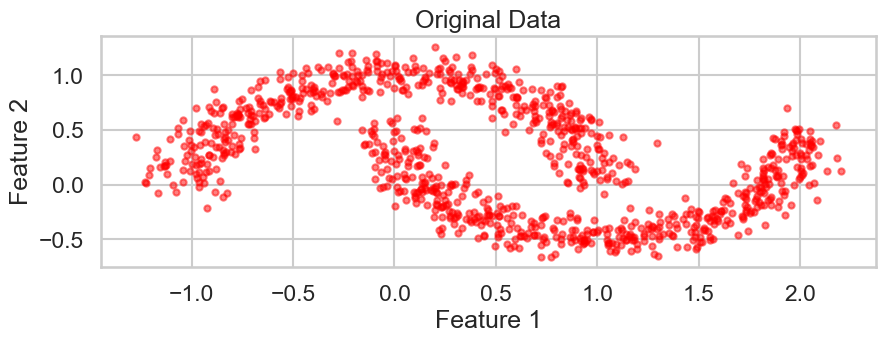

In [17]:
n_samples = 1000
X_3, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X_3)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

EXAMPLE 1 (EUCLIDEAN)
K-means started


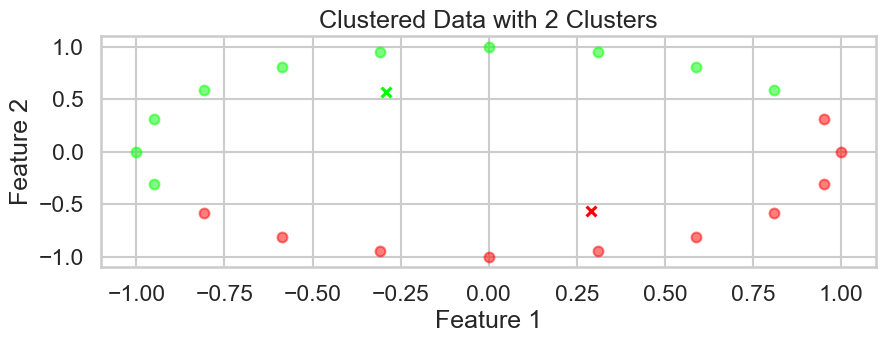

K-means started


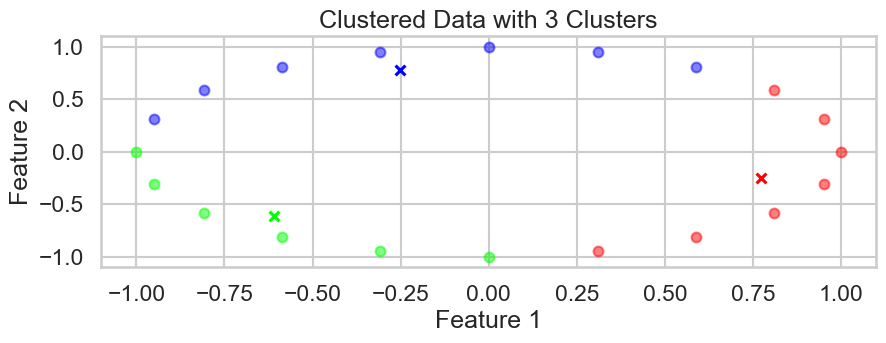

K-means started


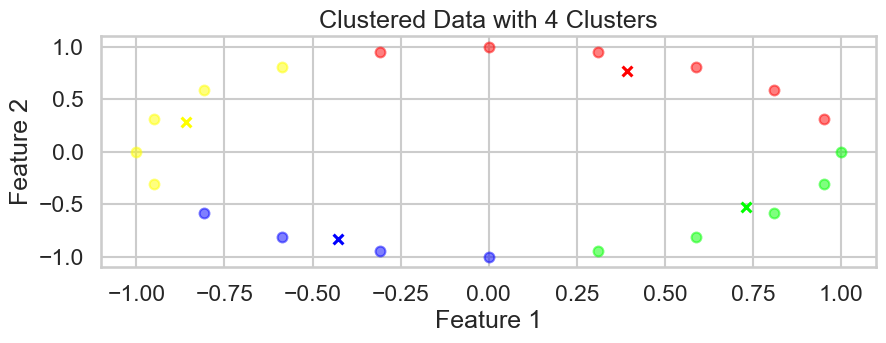

K-means started


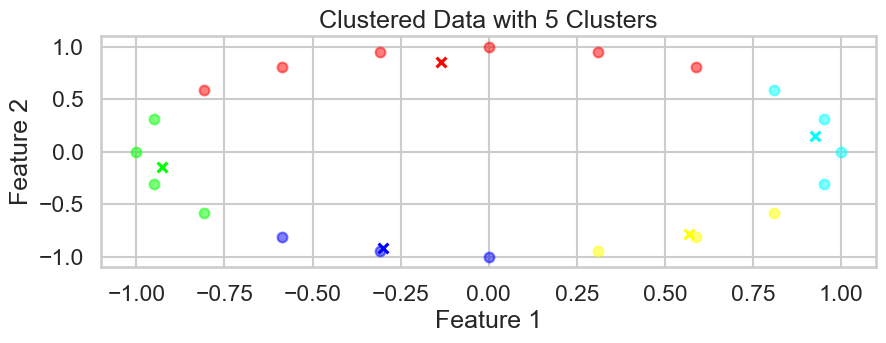

K-means started


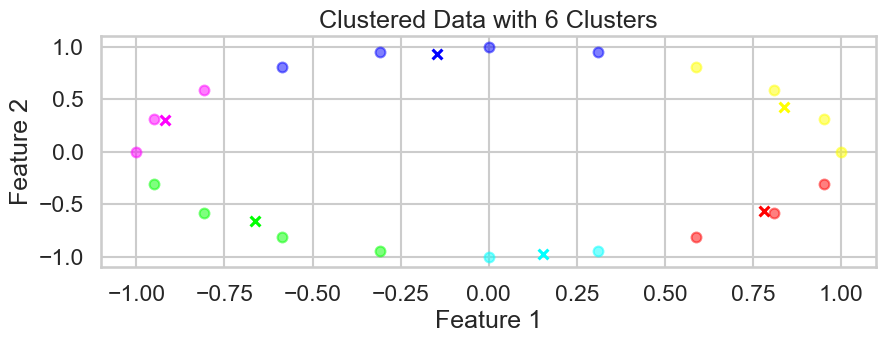

K-means started


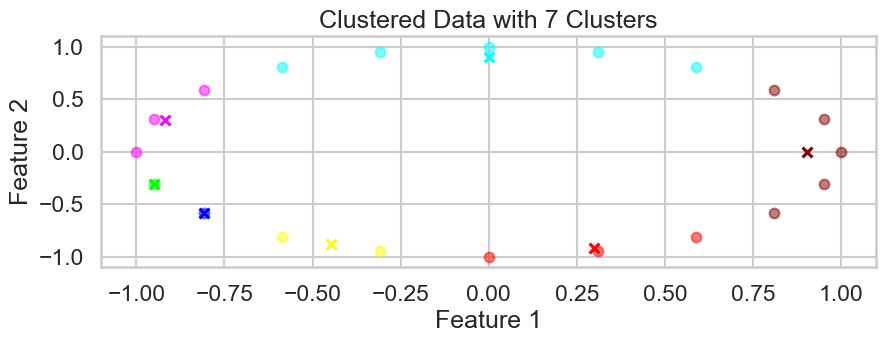

K-means started


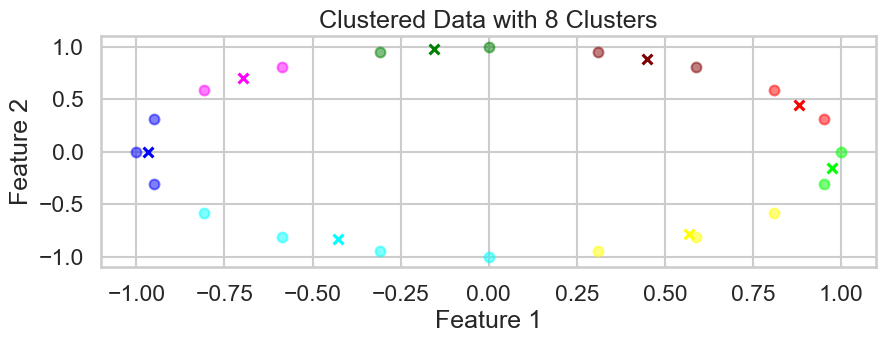

K-means started


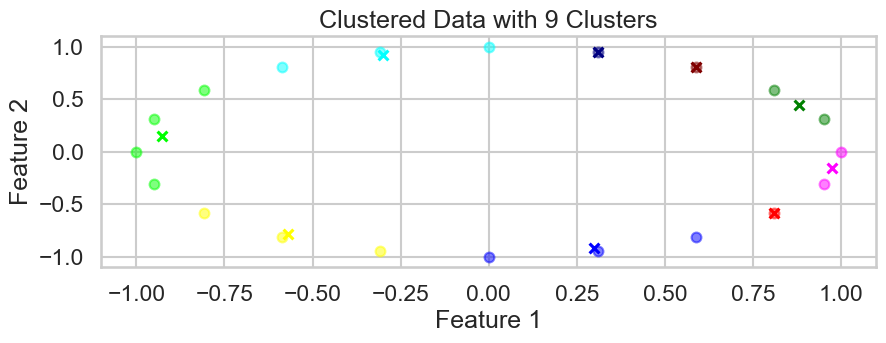

K-means started


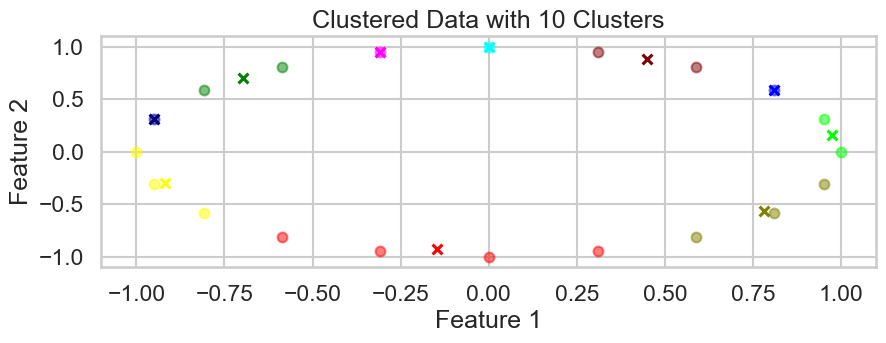

Elbow Graph


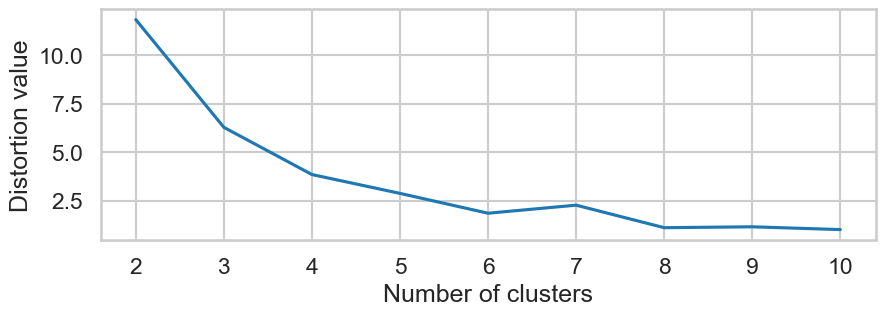

EXAMPLE 2 (EUCLIDEAN)
K-means started


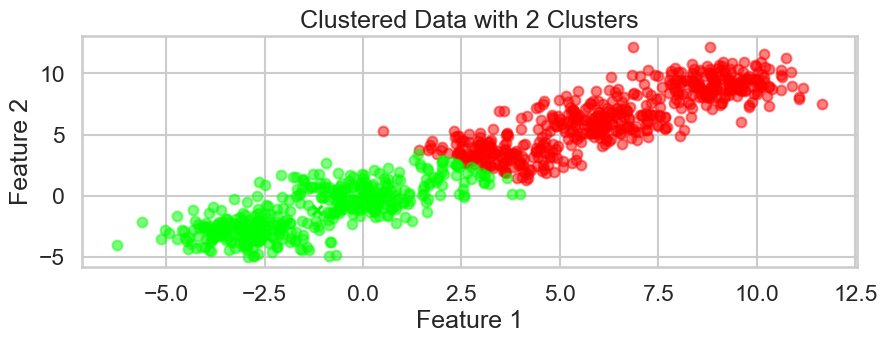

K-means started


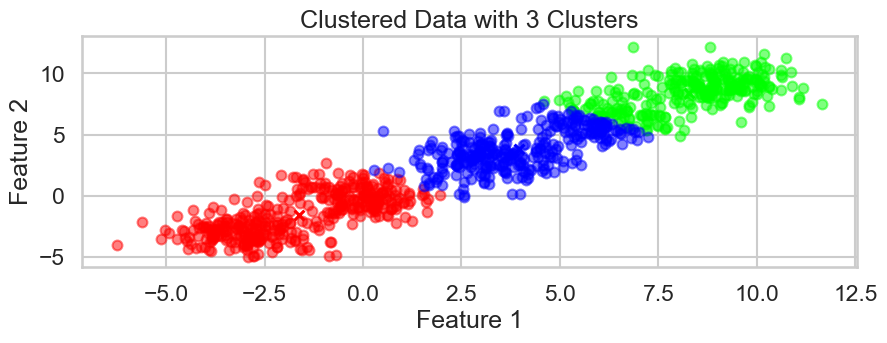

K-means started


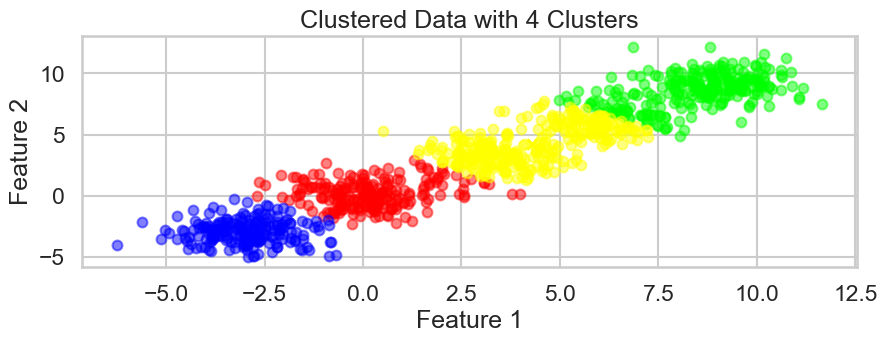

K-means started


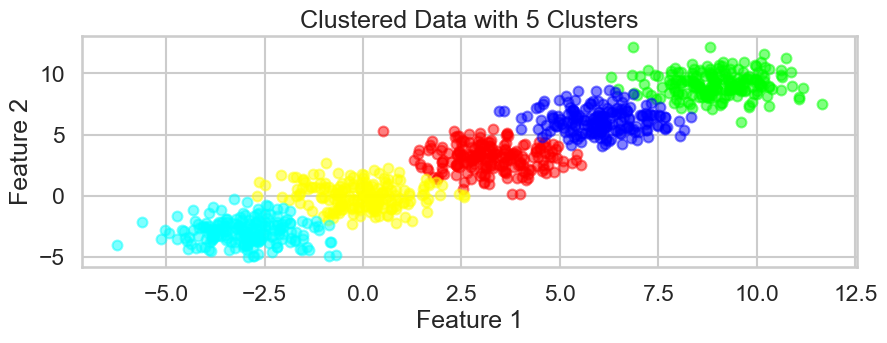

K-means started


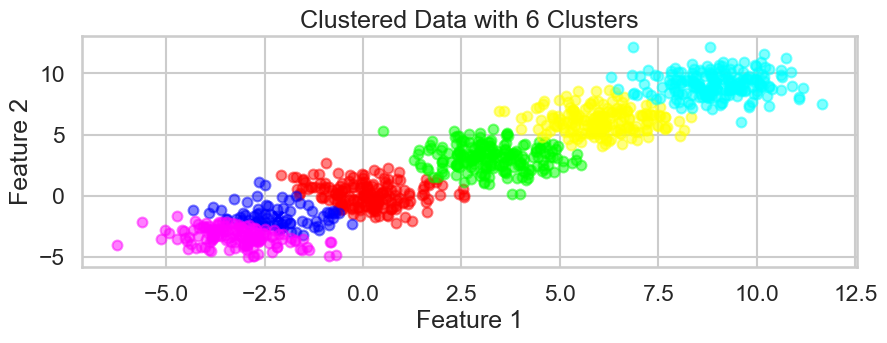

K-means started


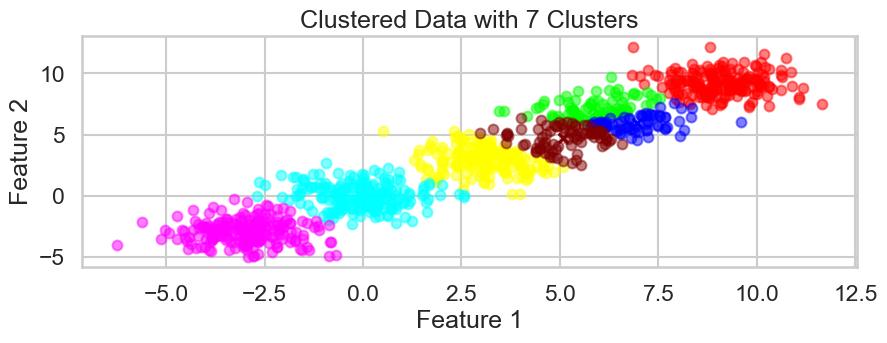

K-means started


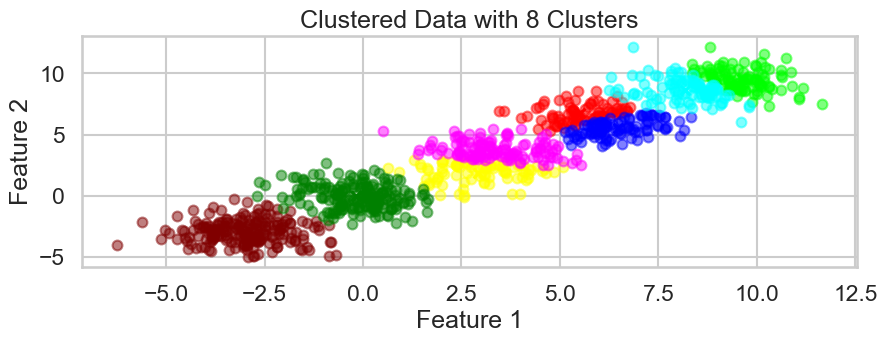

K-means started


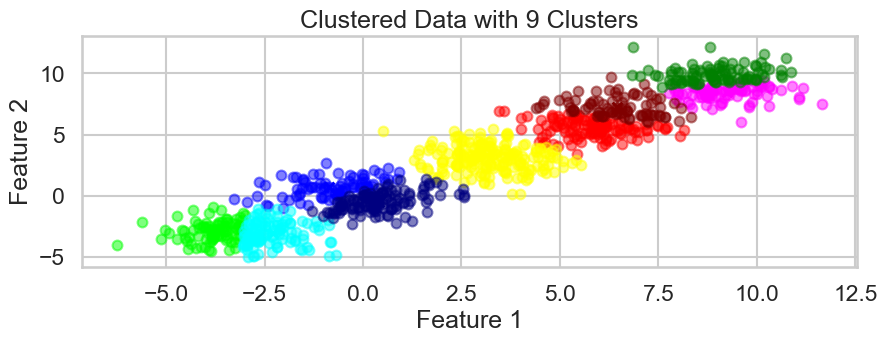

K-means started


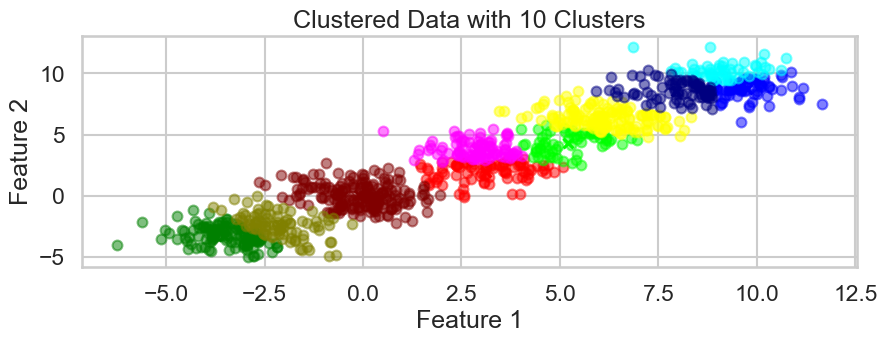

Elbow Graph


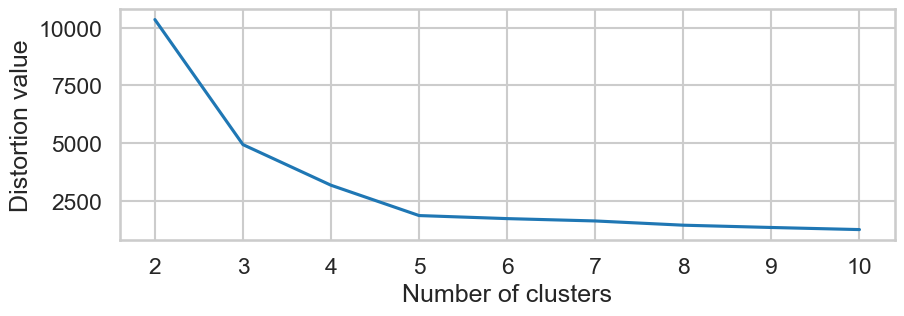

EXAMPLE 3 (EUCLIDEAN)
K-means started


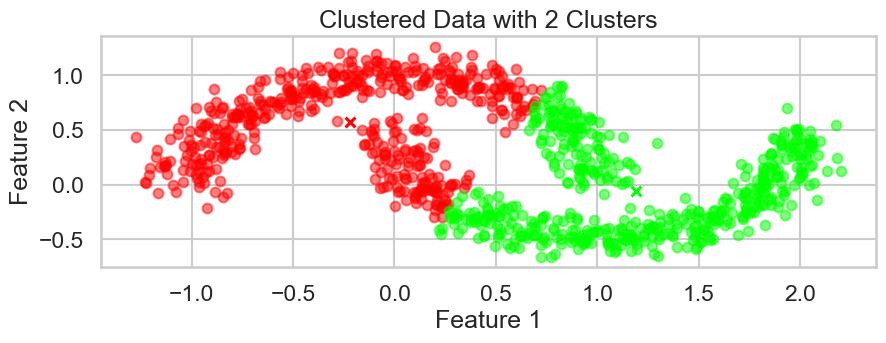

K-means started


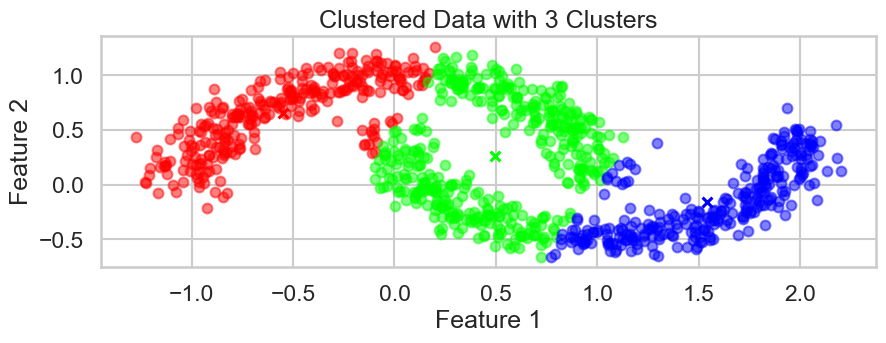

K-means started


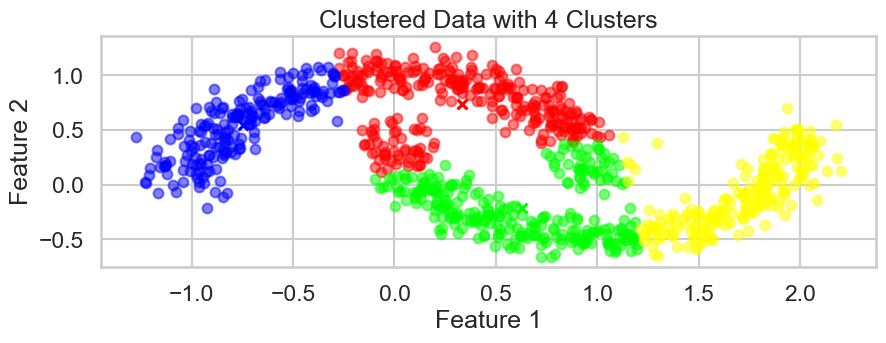

K-means started


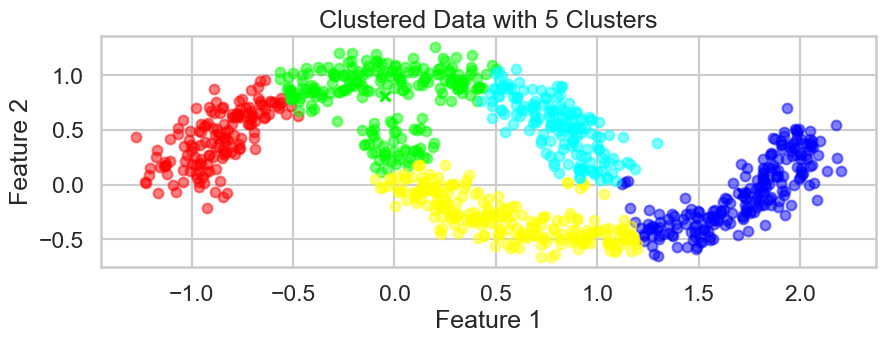

K-means started


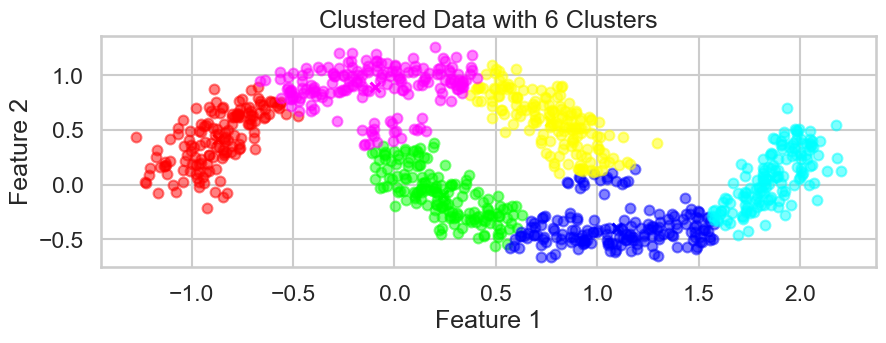

K-means started


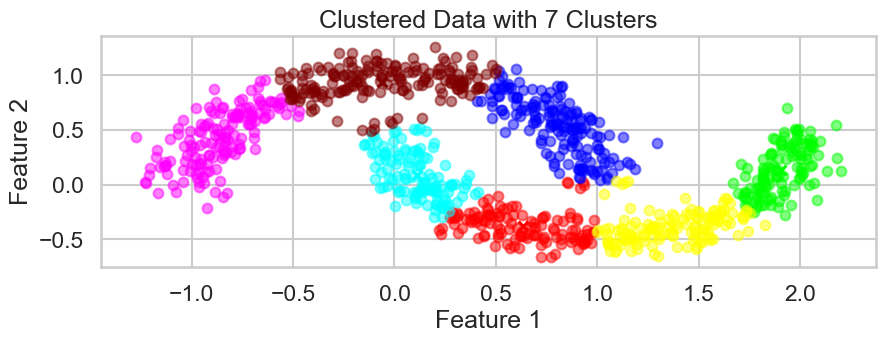

K-means started


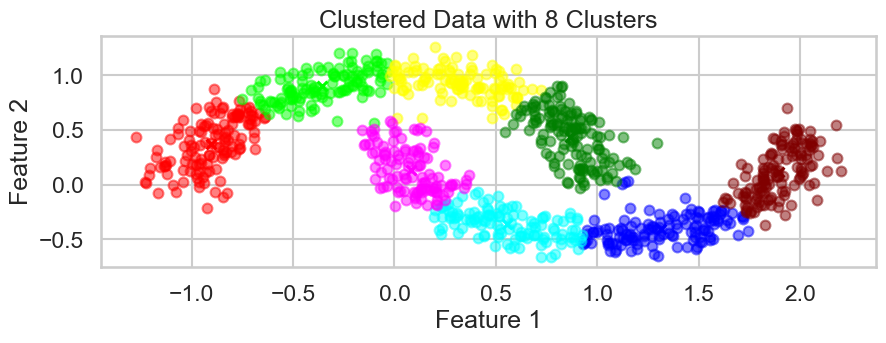

K-means started


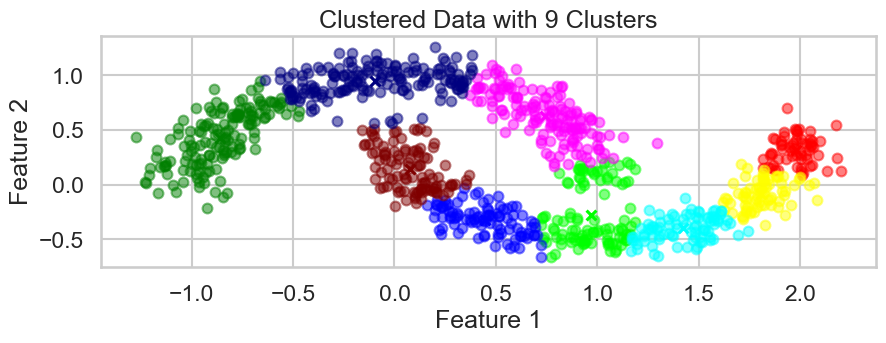

K-means started


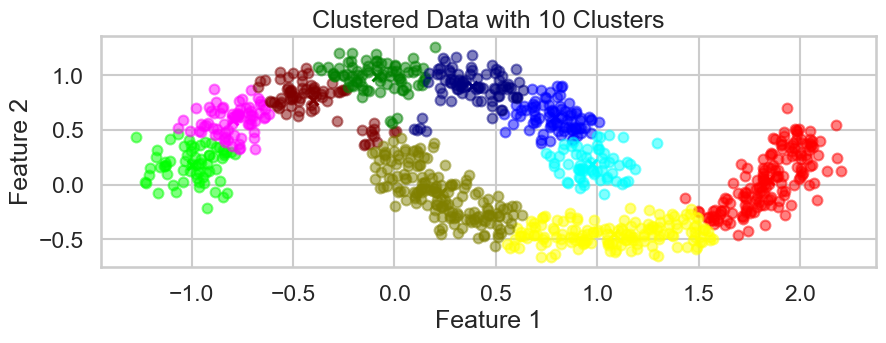

Elbow Graph


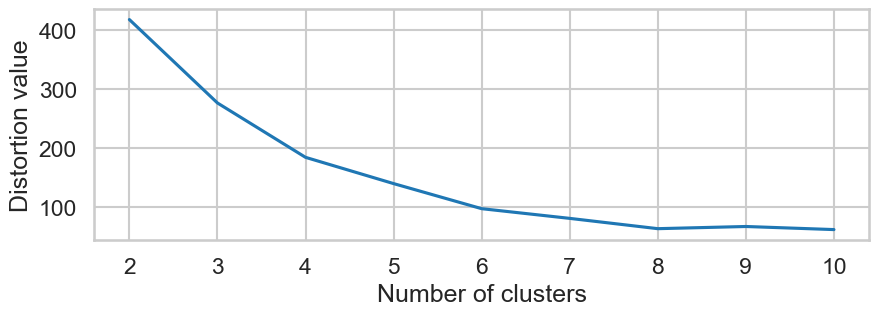

EXAMPLE 1 (Pearson)
K-means started


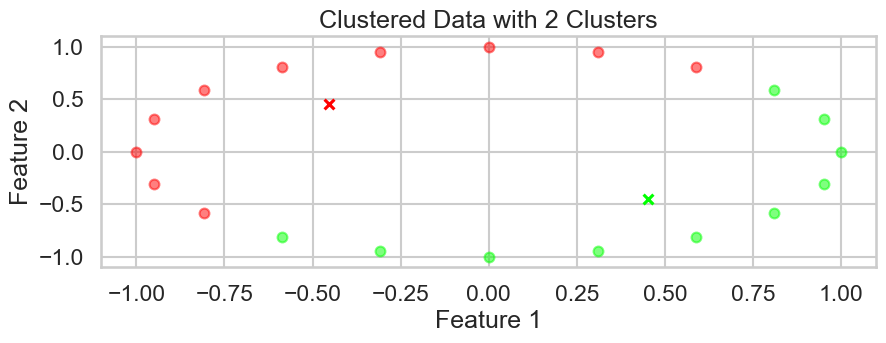

K-means started


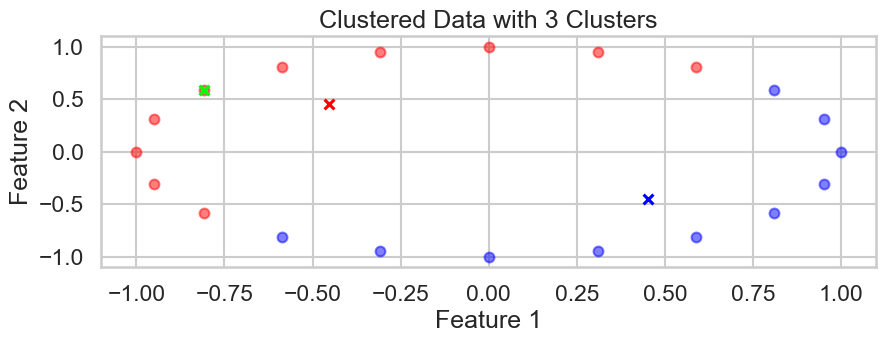

K-means started


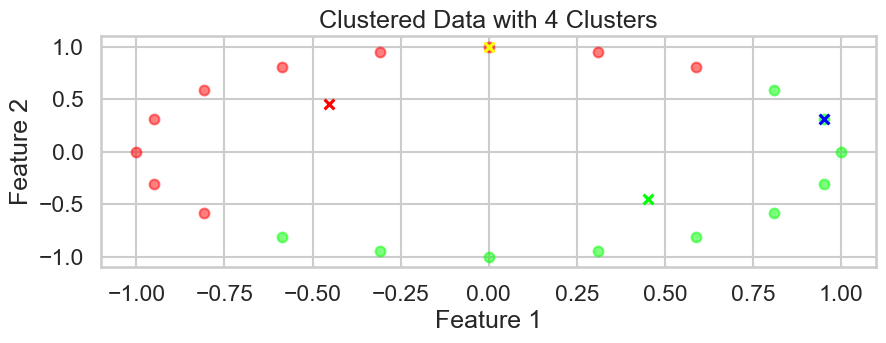

K-means started


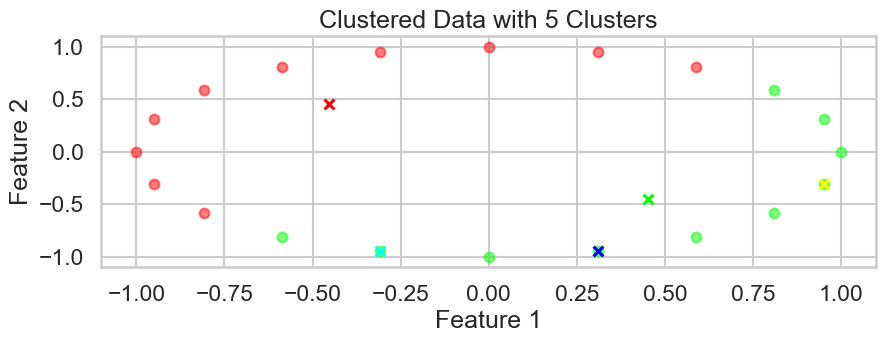

K-means started


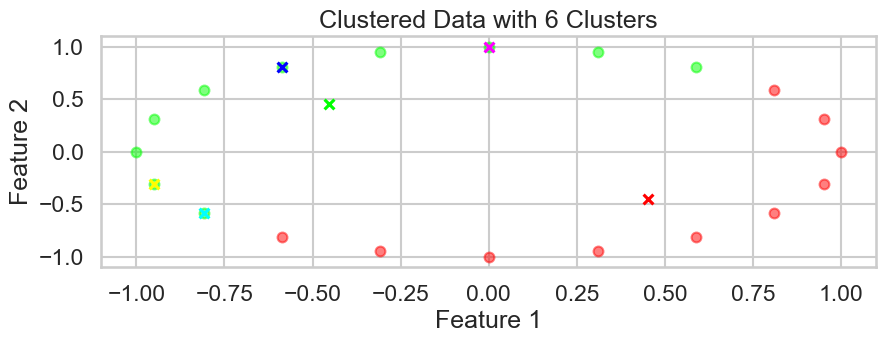

K-means started


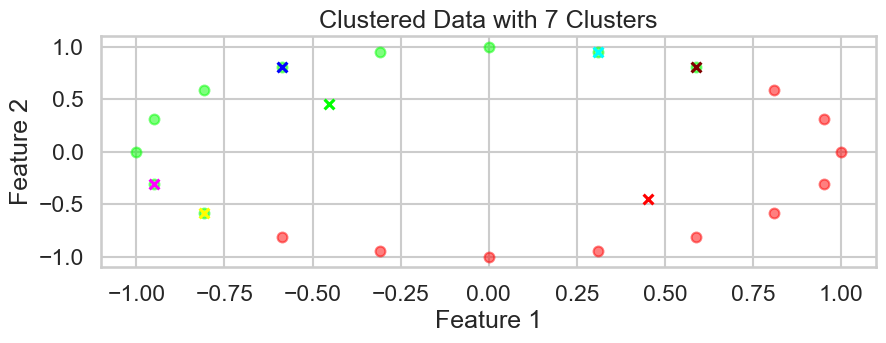

K-means started


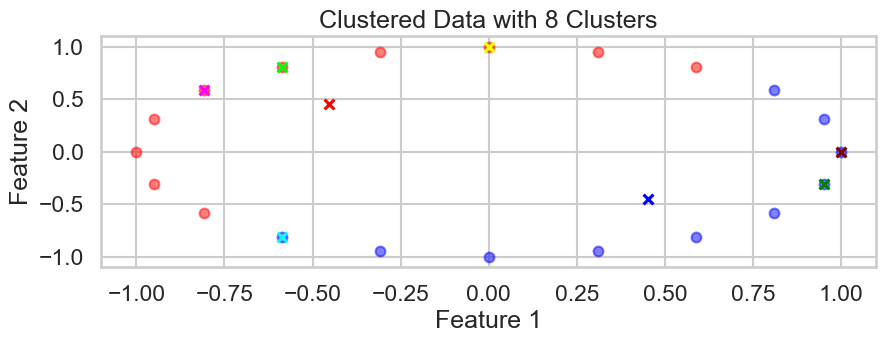

K-means started


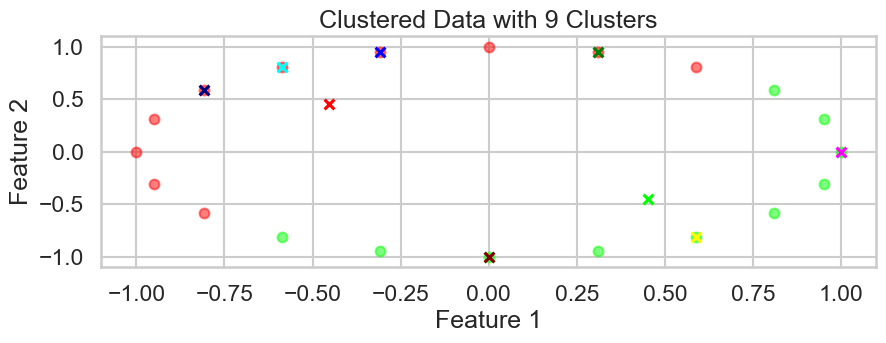

K-means started


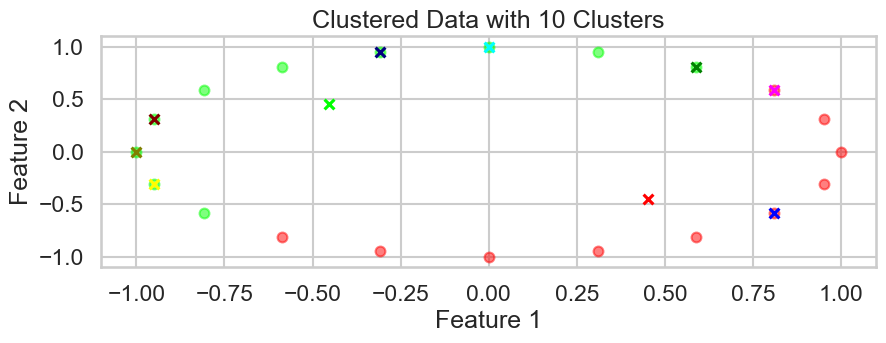

Elbow Graph


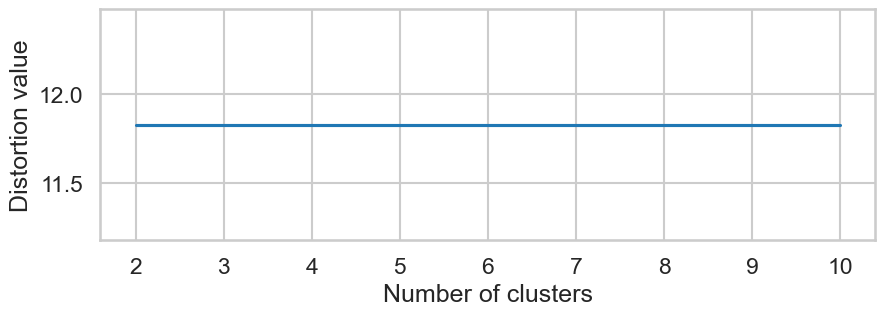

In [31]:
number_of_clusters = np.arange(2, 11)
Distortion_list = []

print("EXAMPLE 1 (EUCLIDEAN)");
for i in range(2,11):
    example_data,Minimum_index , example_centroids, Distortion_value= GUC_Kmean( X_1, i, "Euclidean")
    Distortion_list.append(Distortion_value)
    display_cluster(X=example_data, data_centers=example_centroids, data_labels=Minimum_index, num_clusters=i)
print("Elbow Graph")
plt.figure();
#print(Distortion_list)
#print(len(Distortion_list))
#print(np.array(Distortion_list).shape,number_of_clusters.shape)
plt.plot(number_of_clusters,np.array(Distortion_list));
plt.xlabel("Number of clusters")
plt.ylabel("Distortion value")
plt.show();


Distortion_list = []
print("EXAMPLE 2 (EUCLIDEAN)");
for i in range(2,11):
    example_data,Minimum_index , example_centroids, Distortion_value= GUC_Kmean( X_2, i, "Euclidean")
    Distortion_list.append(Distortion_value)
    display_cluster(X=example_data, data_centers=example_centroids, data_labels=Minimum_index, num_clusters=i)
print("Elbow Graph")
plt.figure();
#print(Distortion_list)
#print(len(Distortion_list))
#print(np.array(Distortion_list).shape,number_of_clusters.shape)
plt.plot(number_of_clusters,np.array(Distortion_list));
plt.xlabel("Number of clusters")
plt.ylabel("Distortion value")
plt.show();

Distortion_list = []
print("EXAMPLE 3 (EUCLIDEAN)");
for i in range(2,11):
    example_data,Minimum_index , example_centroids, Distortion_value= GUC_Kmean( X_3, i, "Euclidean")
    Distortion_list.append(Distortion_value)
    display_cluster(X=example_data, data_centers=example_centroids, data_labels=Minimum_index, num_clusters=i)
print("Elbow Graph")
plt.figure();
#print(Distortion_list)
#print(len(Distortion_list))
#print(np.array(Distortion_list).shape,number_of_clusters.shape)
plt.plot(number_of_clusters,np.array(Distortion_list));
plt.xlabel("Number of clusters")
plt.ylabel("Distortion value")
plt.show();

Distortion_list = []
print("EXAMPLE 1 (Pearson)");
for i in range(2,11):
    example_data,Minimum_index , example_centroids, Distortion_value= GUC_Kmean( X_1, i, "Correlation")
    Distortion_list.append(Distortion_value)
    display_cluster(X=example_data, data_centers=example_centroids, data_labels=Minimum_index, num_clusters=i)
print("Elbow Graph")
plt.figure();
#print(Distortion_list)
#print(len(Distortion_list))
#print(np.array(Distortion_list).shape,number_of_clusters.shape)
plt.plot(number_of_clusters,np.array(Distortion_list));
plt.xlabel("Number of clusters")
plt.ylabel("Distortion value")
plt.show();


## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [50]:
from mpl_toolkits.mplot3d import Axes3D

def display_cluster_3d(X, data_centers=None, data_labels=None, num_clusters=0, column_labels=None):
    color = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF', '#800000', '#008000', '#000080', '#808000', '#008080', '#800080']
    no_of_features = X.shape[1]
    plt.rcParams['figure.figsize'] = [10, 7]
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    if data_centers is not None and data_labels is not None:
        for k in range(num_clusters):
            ax.scatter(data_centers[k, 0], data_centers[k, 1], data_centers[k, 2], c=color[k], marker='x', s=200)  
            ax.scatter(X[data_labels == k, 0], X[data_labels == k, 1], X[data_labels == k, 2], c=color[k], alpha=0.5, s=20)  

        ax.set_xlabel(column_labels[0])
        ax.set_ylabel(column_labels[1])
        ax.set_zlabel(column_labels[2])
        ax.set_title('Clustered Data with ' + str(num_clusters) + ' Clusters')
    else:
        ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color[0], alpha=0.5, s=20)  
        ax.set_xlabel(column_labels[0])
        ax.set_ylabel(column_labels[1])
        ax.set_zlabel(column_labels[2])
        ax.set_title('Original Data')

    plt.show()

[[     0      0     67 ... 124670      1      2]
 [     1      1     22 ... 150773      1      2]
 [     0      0     49 ...  89210      0      0]
 ...
 [     0      0     31 ...  86400      0      0]
 [     1      1     24 ...  97968      0      0]
 [     0      0     25 ...  68416      0      0]]
CUSTOMER DATA (EUCLIDEAN)
K-means started


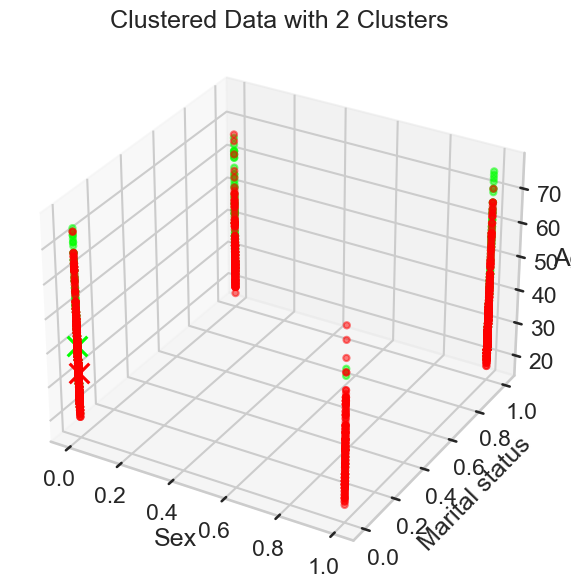

K-means started


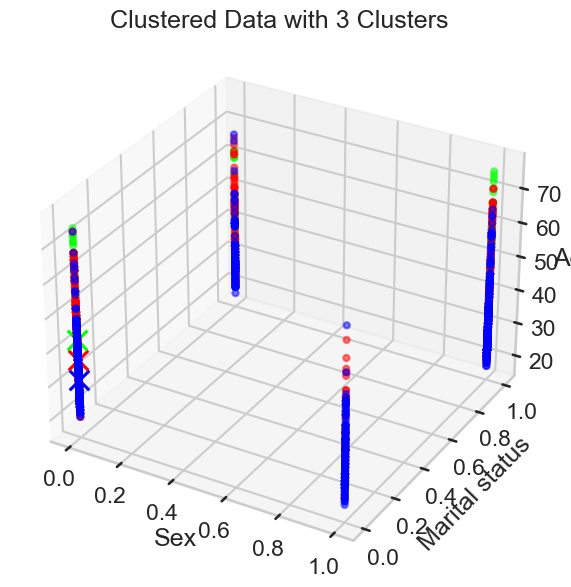

K-means started


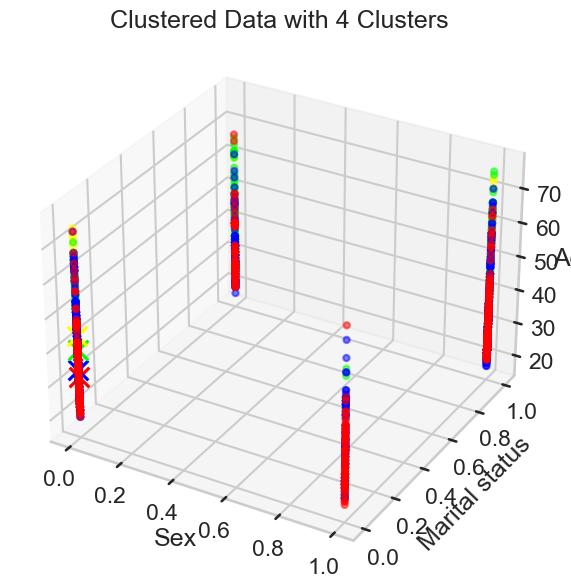

K-means started


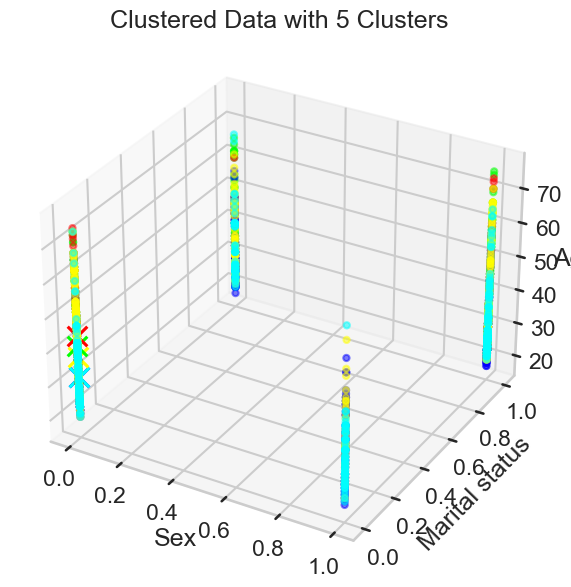

K-means started


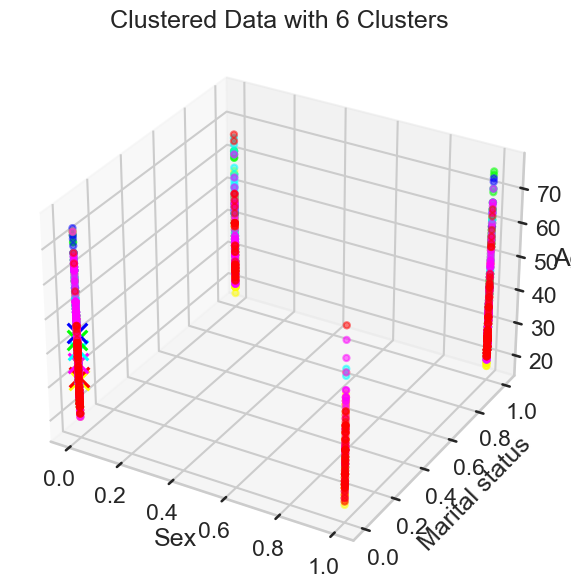

K-means started


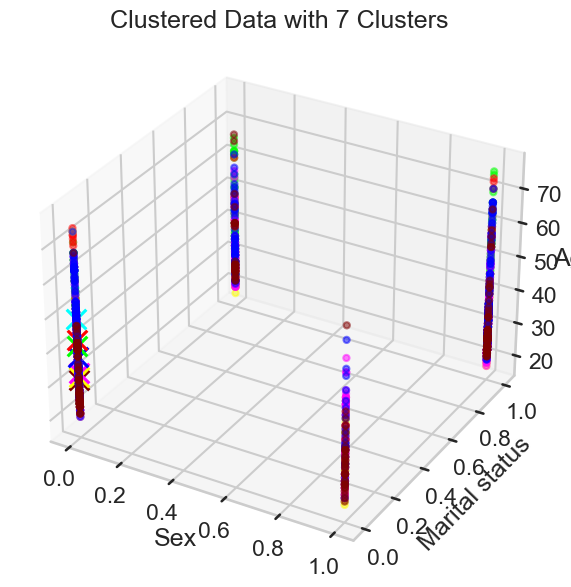

K-means started


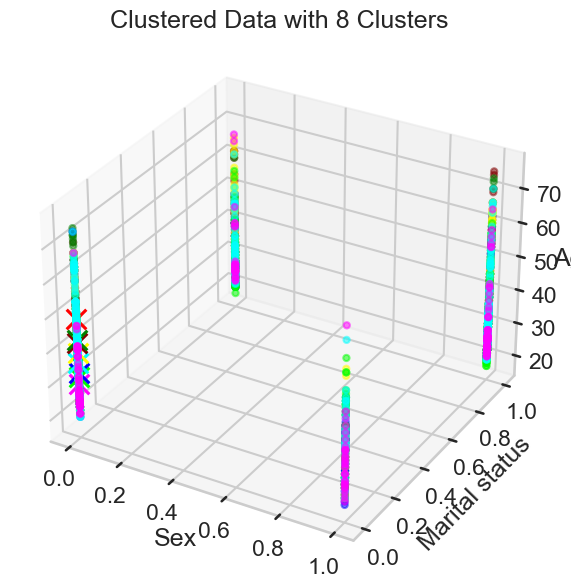

K-means started


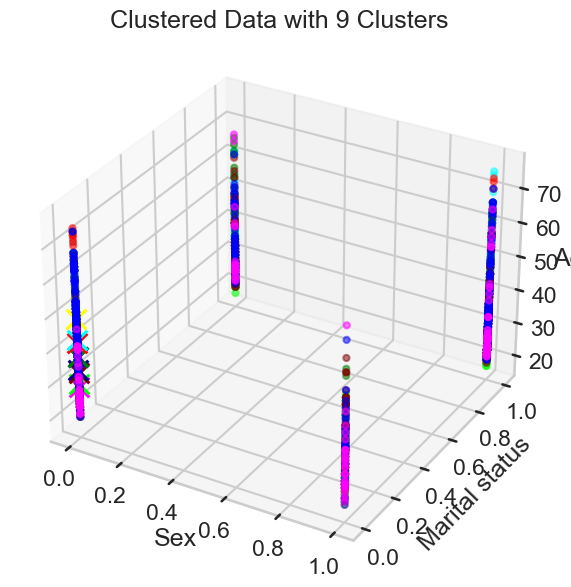

K-means started


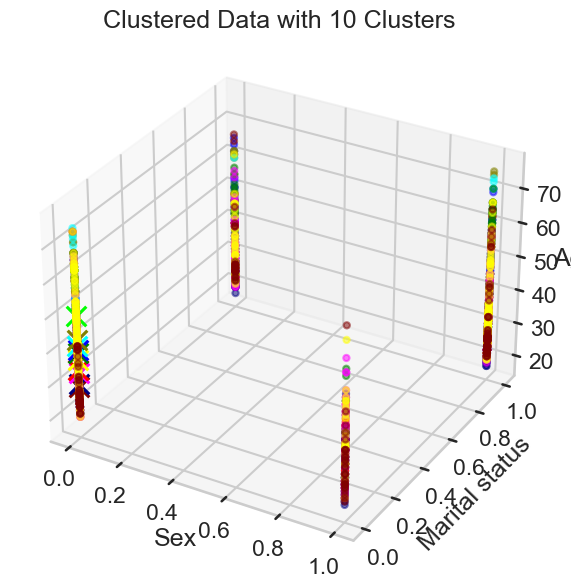

Elbow Graph


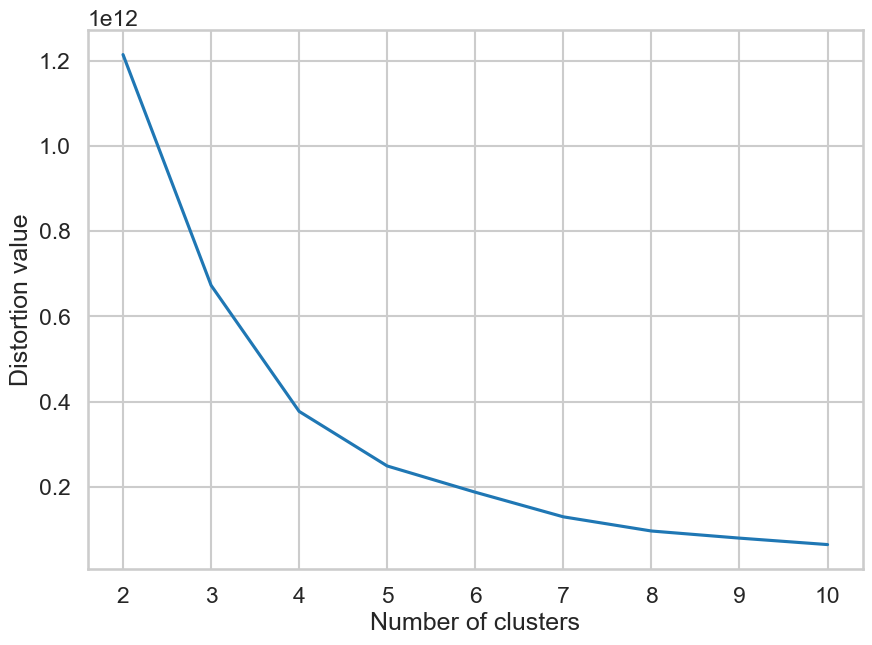

CUSTOMER DATA (CORRELATION)
K-means started


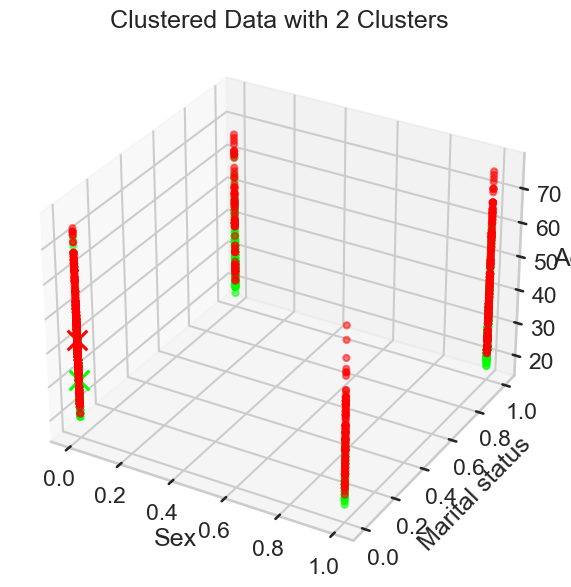

K-means started


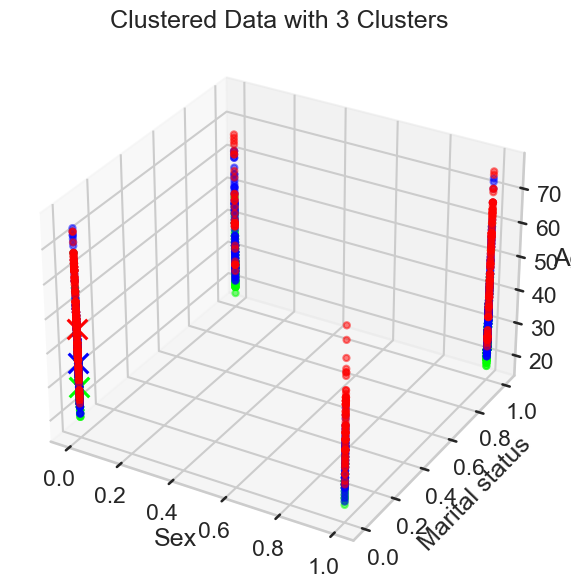

K-means started


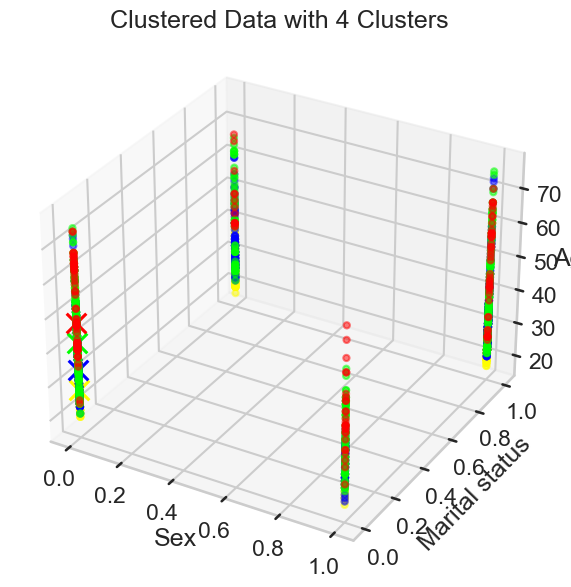

K-means started


KeyboardInterrupt: 

In [51]:
#Reading the CSV file
data_csv = pd.read_csv('D:\GUC\Semester_10\Machine Learning\Practical Assignments and Projects\Assignment 1/Customer data.csv')

#drop first column
data_csv = data_csv.drop(data_csv.columns[0], axis=1)

#Extracting Column Labels:
column_labels = data_csv.columns.tolist()

#Extracting Data Points:
data_needed = data_csv.values
#print("Data points:")
#print(data_csv)

print(data_needed)
number_of_clusters = np.arange(2, 11)

Distortion_list = []
print("CUSTOMER DATA (EUCLIDEAN)");
for i in range(2,11):
    example_data,Minimum_index , example_centroids, Distortion_value=GUC_Kmean( data_needed, i,"Euclidean")
    Distortion_list.append(Distortion_value)
    display_cluster_3d(X=example_data, data_centers=example_centroids, data_labels=Minimum_index, column_labels=column_labels,num_clusters=i)
print("Elbow Graph")
plt.figure();
#print(Distortion_list)
#print(len(Distortion_list))
#print(np.array(Distortion_list).shape,number_of_clusters.shape)
plt.plot(number_of_clusters,np.array(Distortion_list));
plt.xlabel("Number of clusters")
plt.ylabel("Distortion value")
plt.show();


Distortion_list = []
print("CUSTOMER DATA (CORRELATION)");
for i in range(2,11):
     example_data,Minimum_index , example_centroids, Distortion_value=GUC_Kmean( data_needed, i,"Correlation")
     Distortion_list.append(Distortion_value)
     display_cluster_3d(X=example_data, data_centers=example_centroids, data_labels=Minimum_index, column_labels=column_labels,num_clusters=i)
print("Elbow Graph")
plt.figure();
#print(Distortion_list)
#print(len(Distortion_list))
#print(np.array(Distortion_list).shape,number_of_clusters.shape)
plt.plot(number_of_clusters,np.array(Distortion_list));
plt.xlabel("Number of clusters")
plt.ylabel("Distortion value")
plt.show();
